<a href="https://colab.research.google.com/github/kanishkbjain/TEI_HockeyPrediction/blob/main/Team_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA
##For real this time

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#You don't have to worry about this. I'm using Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Erdos Institute Boot Camp/Erdos Institute Final Project - SKYLAB/TeamCleaned.csv") #TeamData.csv

In [7]:
data.describe()
#Cool. Notice that that SAT% is actually 50% on average! Holy shit, we did it, reddit!

,Unnamed: 0,Year,Rk,AvAge,GP,W,L,OL,PTS,PTS%,...,GvA,GvA/60,TkA,TkA/60,ENG,MsS,5v5 TOI/GP,SAT%,Playoffs%,WonCup
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,257.500000,2013.073643,15.682171,27.952713,77.728682,38.864341,29.846899,9.017442,86.746124,0.557973,...,643.763566,8.152287,538.104651,6.800853,8.990310,905.513566,47.221447,50.007190,-0.335998,-0.472868
std,149.100637,4.924912,8.775946,1.094032,9.937281,8.926072,7.837538,3.027653,17.923231,0.090792,...,175.052853,1.916634,132.365105,1.336286,4.299233,152.549485,1.659253,2.800658,0.700571,0.558466
min,0.000000,2005.000000,1.000000,25.500000,48.000000,15.000000,7.000000,0.000000,36.000000,0.275000,...,206.000000,3.900000,194.000000,3.430000,0.000000,449.000000,41.000000,37.500000,-1.000000,-1.000000
25%,128.750000,2009.000000,8.000000,27.100000,82.000000,33.000000,25.000000,7.000000,76.000000,0.494000,...,518.000000,6.765000,456.000000,5.847500,6.000000,849.750000,46.300000,48.000000,-1.000000,-1.000000
50%,257.500000,2013.000000,16.000000,28.000000,82.000000,40.000000,29.000000,9.000000,89.000000,0.567000,...,643.500000,8.095000,536.000000,6.690000,8.000000,928.000000,47.550000,50.000000,-1.000000,-1.000000
75%,386.250000,2017.000000,23.000000,28.600000,82.000000,46.000000,35.000000,11.000000,100.000000,0.622000,...,769.000000,9.462500,621.000000,7.622500,12.000000,1007.000000,48.387500,51.862500,0.187500,0.000000
max,515.000000,2021.000000,32.000000,32.300000,82.000000,62.000000,56.000000,18.000000,128.000000,0.802000,...,1278.000000,15.470000,986.000000,11.880000,24.000000,1238.000000,50.750000,59.370000,1.000000,1.000000


Scaling the data. Until we save this version, you should run it every time.

In [16]:
data['W'] = data['W']/data['GP']
data['L'] = data['L']/data['GP']
data['GF'] = data['GF']/data['GP']
data['GA'] = data['GA']/data['GP']
data['S'] = data['S']/data['GP']
data['SA'] = data['SA']/data['GP']
data['MsS'] = data['MsS']/data['GP']
data['TA/GA'] = data['TkA/60']/data['GvA/60']

In [43]:
data = data[:-32] #For data analysis and such, we can't include the last season, since we don't know the results yet.
data.tail()

,Unnamed: 0,Year,Rk,Team,AvAge,GP,W,L,OL,PTS,...,TkA,TkA/60,ENG,MsS,5v5 TOI/GP,SAT%,Playoffs%,Playoffs,WonCup,TA/GA
479,479,2020,27,Detroit Red Wings,29.3,56,0.339286,0.482143,10,48,...,201,3.54,13,9.017857,48.583333,45.5,-1.0,f,-1,0.497191
480,480,2020,28,Columbus Blue Jackets,27.1,56,0.321429,0.464286,12,48,...,316,5.54,5,9.535714,50.750000,46.5,-1.0,f,-1,0.683951
481,481,2020,29,New Jersey Devils,25.9,56,0.339286,0.535714,7,45,...,413,7.28,5,11.607143,49.216667,50.5,-1.0,f,-1,0.770370
482,482,2020,30,Anaheim Ducks,28.2,56,0.303571,0.535714,9,43,...,309,5.45,5,11.732143,49.516667,48.8,-1.0,f,-1,0.670357
483,483,2020,31,Buffalo Sabres,26.9,56,0.267857,0.607143,7,37,...,322,5.67,8,10.571429,50.083333,46.6,-1.0,f,-1,0.921951


#EDA for Playoff Data. 
Unlike the obvious trends for predicting wins/points in the regular season, there doesn't appear to be as obvious a connection between any features and playoff success, as measured by this metric.

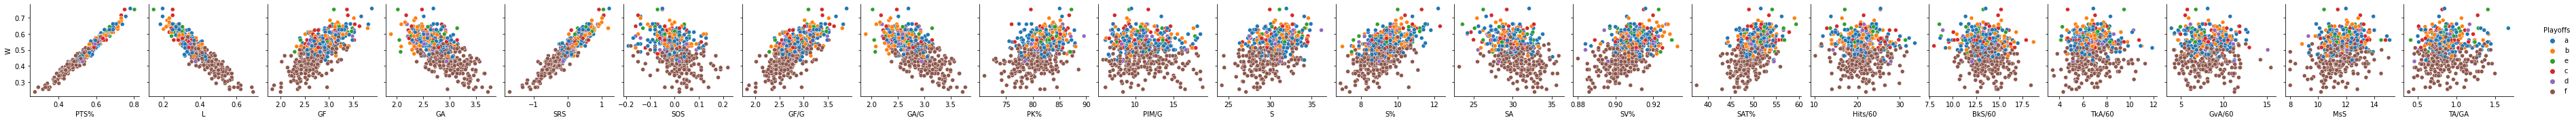

In [44]:
#e (green for me) is people who won the cup. There's a lot of trash here, but I'm not seeing any obvious trends.
#there's a lot of f's (maroon) at the bottom, since that's the people who won less and therefore didn't qualify for the playoffs
sns.pairplot(data=data,
             hue = 'Playoffs',
             y_vars = ['W'],
             x_vars = ['PTS%', 'L', 'GF', 'GA', 'SRS', 'SOS', 'GF/G', 'GA/G', 'PK%', 'PIM/G', 'S', 'S%', 'SA', 'SV%', 'SAT%', 'Hits/60', 'BkS/60', 'TkA/60', 'GvA/60', 'MsS', 'TA/GA'])


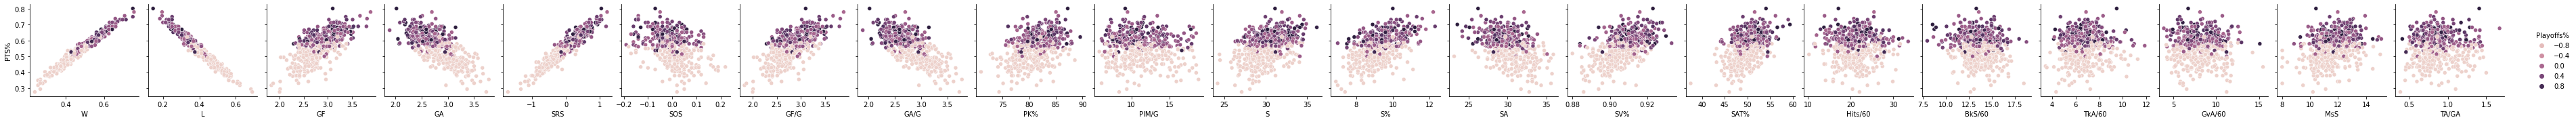

In [45]:
#We're looking for the darkest dots to be... something. Any pattern, really.
#Looks like regular season success doesn't necessarily correlate with post-season success/luck

sns.pairplot(data=data,
             hue = 'Playoffs%',
             y_vars = ['PTS%'],
             x_vars = ['W', 'L', 'GF', 'GA', 'SRS', 'SOS', 'GF/G', 'GA/G', 'PK%', 'PIM/G', 'S', 'S%', 'SA', 'SV%', 'SAT%', 'Hits/60', 'BkS/60', 'TkA/60', 'GvA/60', 'MsS', 'TA/GA'])


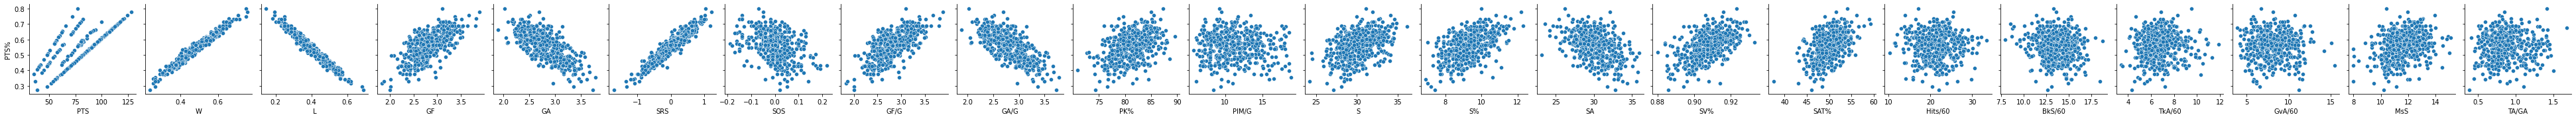

In [46]:
#Original graphs for reference.

sns.pairplot(data=data,
             y_vars = ['PTS%'],
             x_vars = ['PTS', 'W','L', 'GF', 'GA', 'SRS', 'SOS', 'GF/G', 'GA/G', 'PK%', 'PIM/G', 'S', 'S%', 'SA', 'SV%', 'SAT%', 'Hits/60', 'BkS/60', 'TkA/60', 'GvA/60', 'MsS', 'TA/GA'])


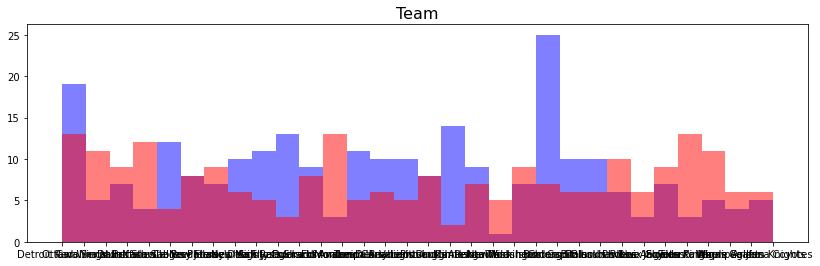

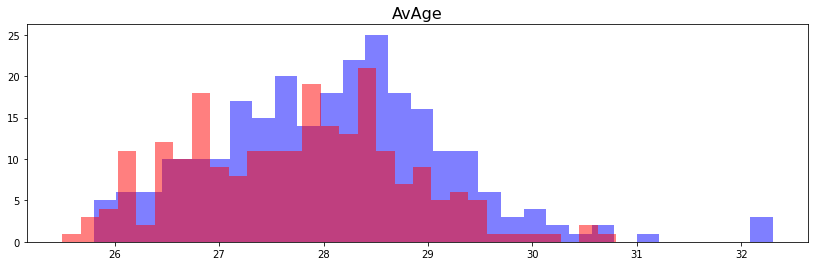

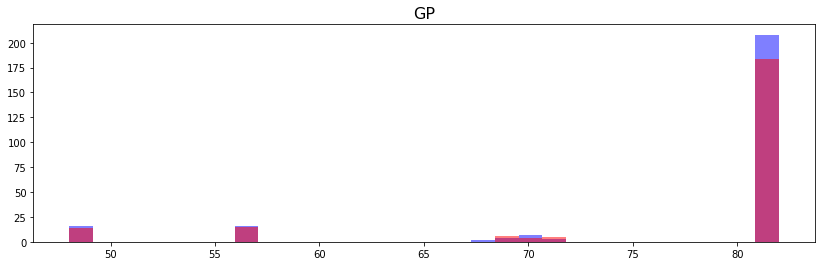

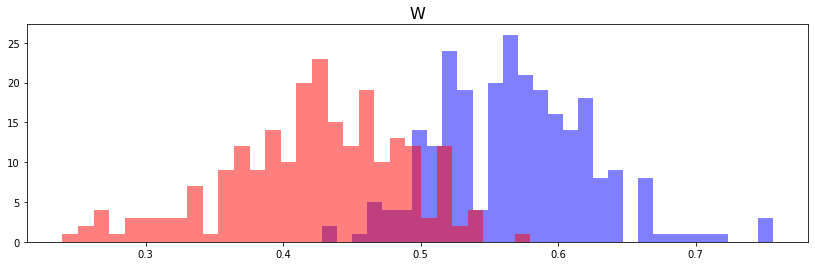

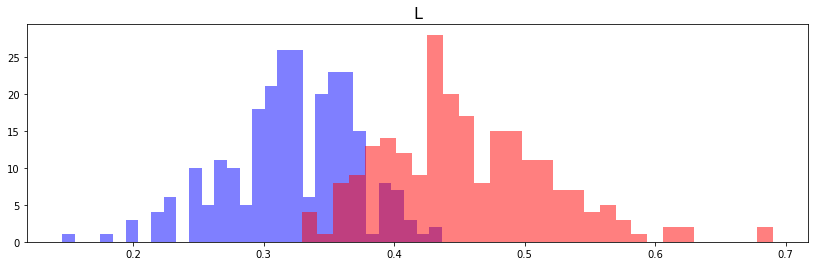

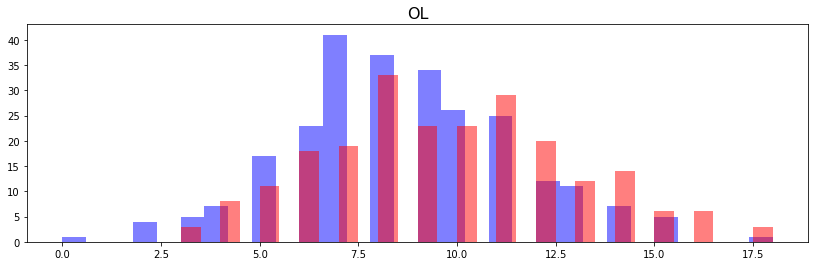

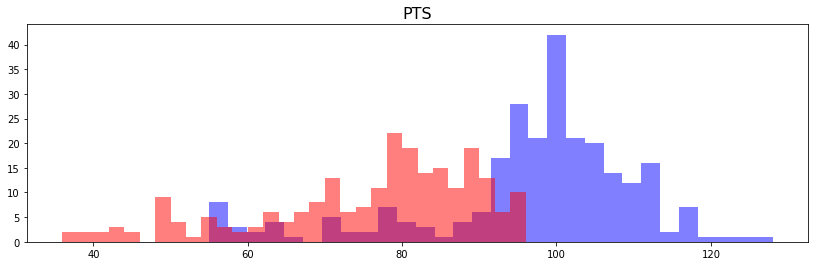

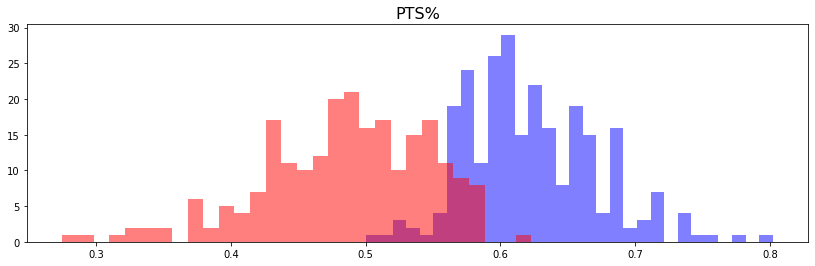

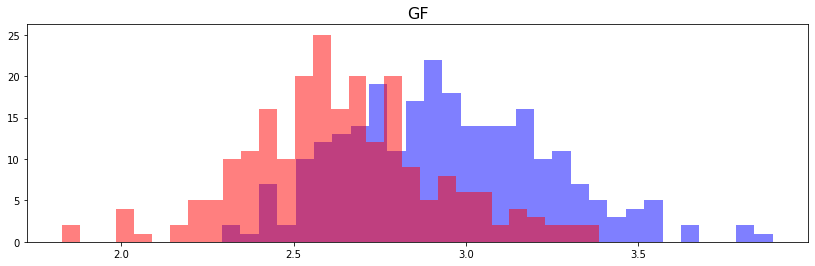

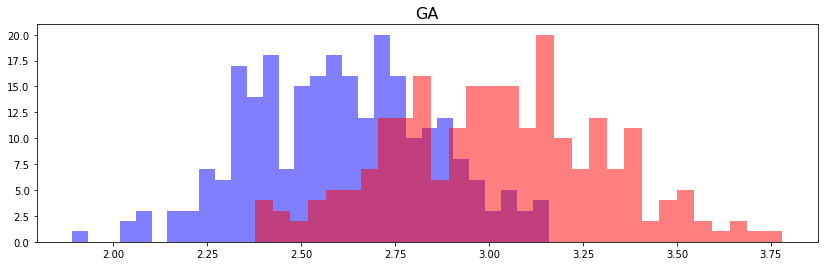

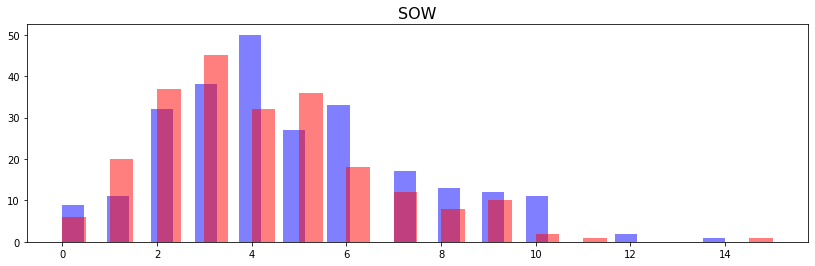

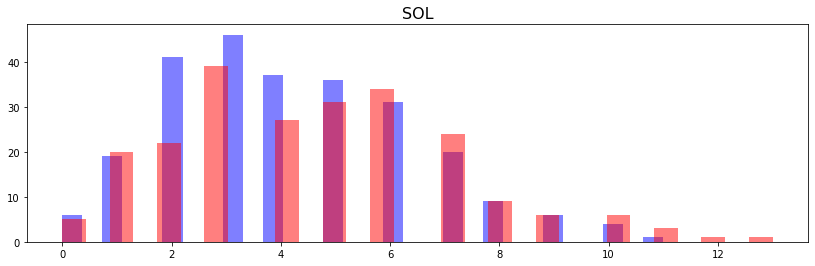

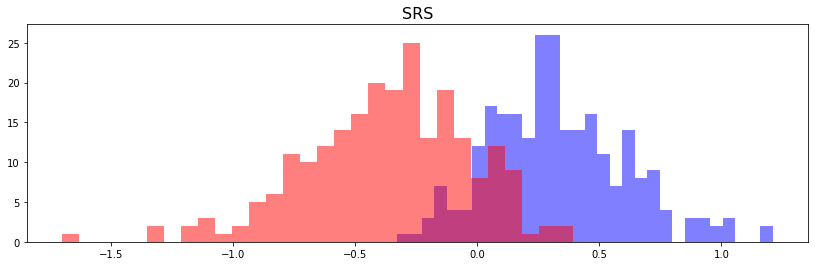

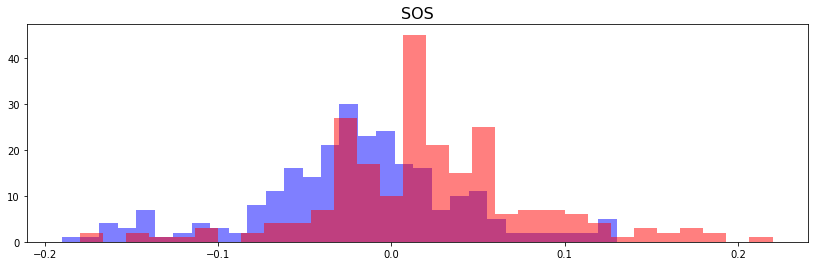

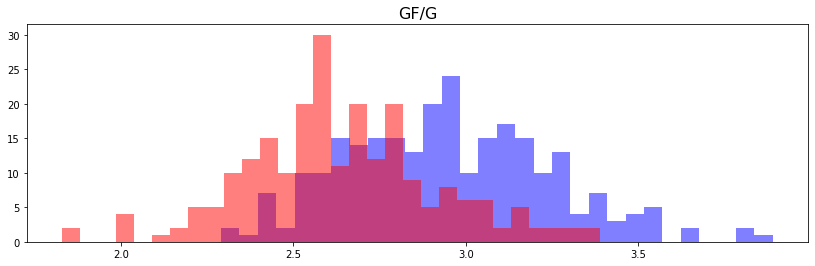

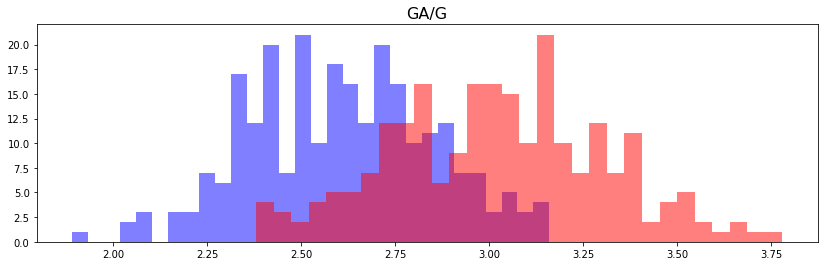

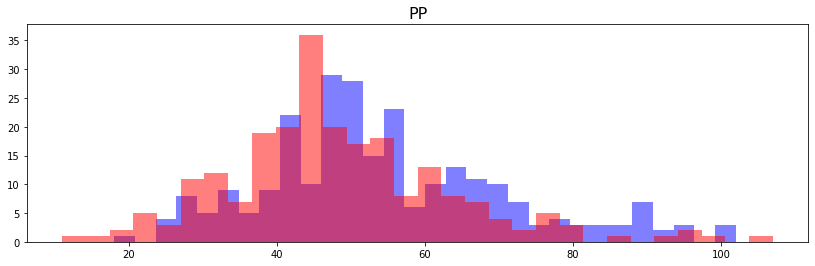

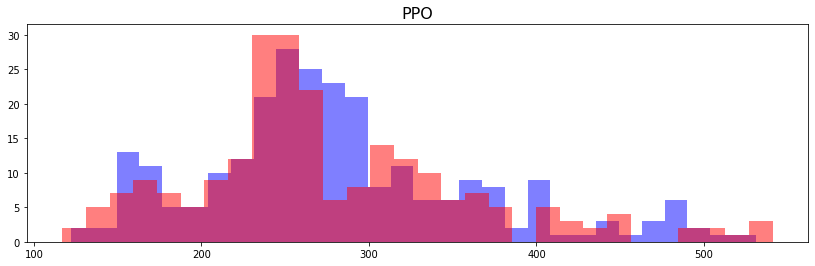

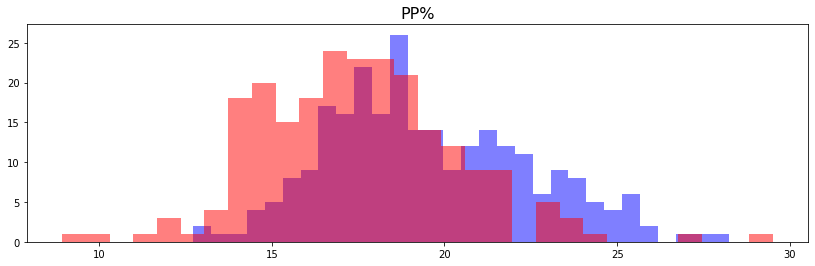

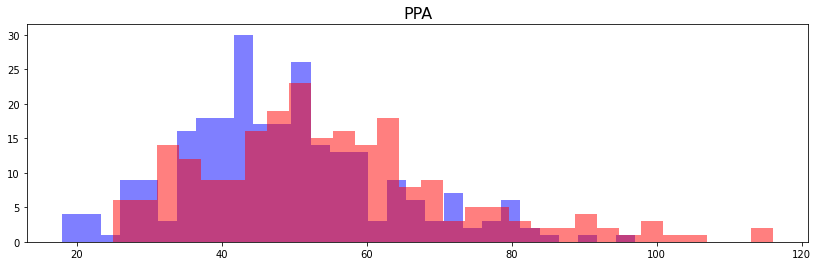

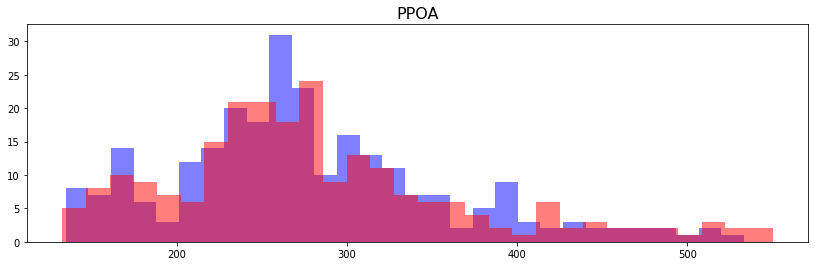

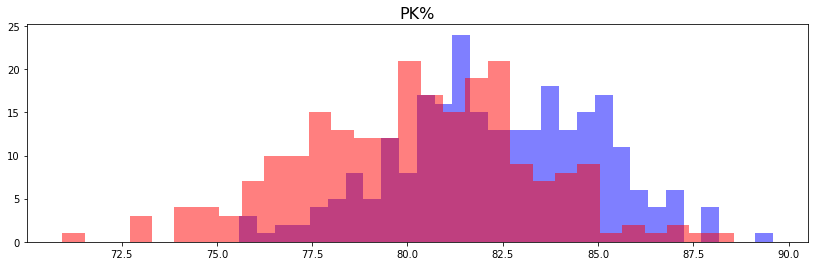

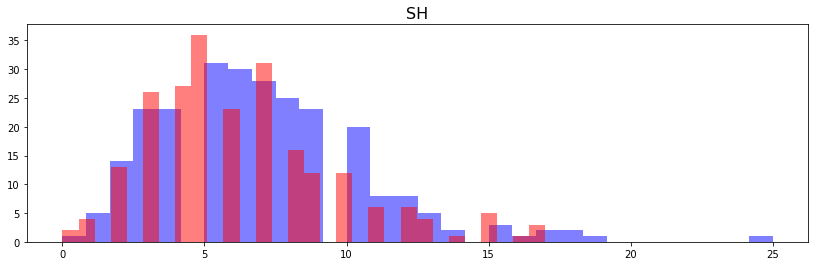

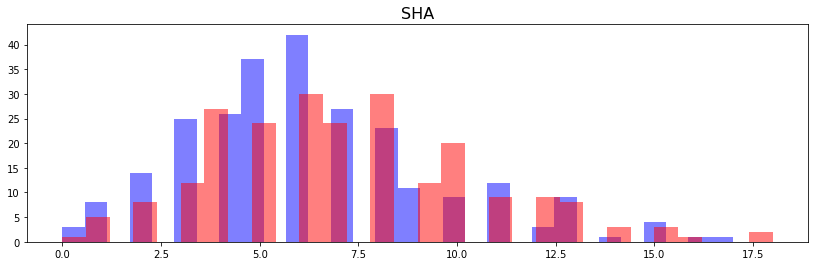

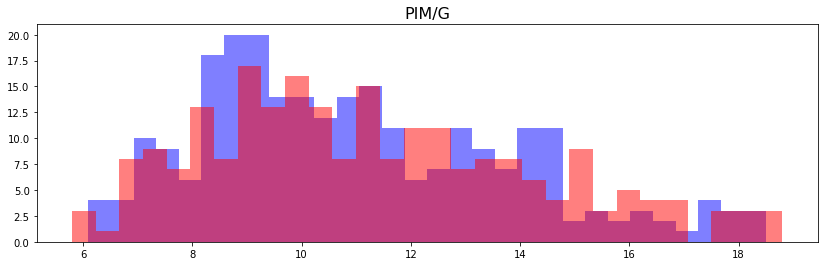

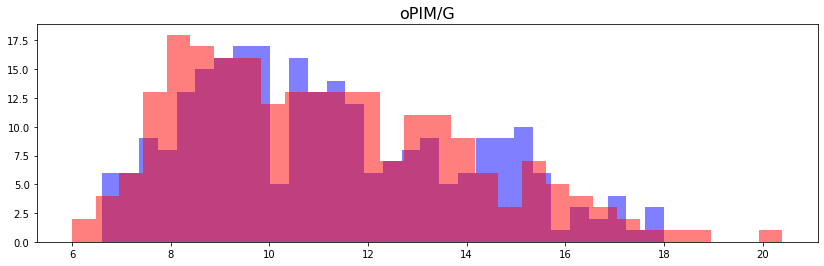

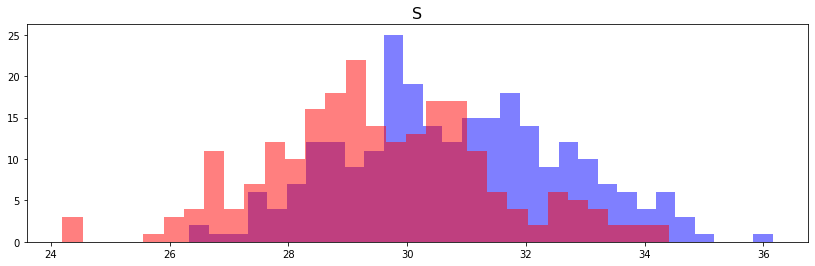

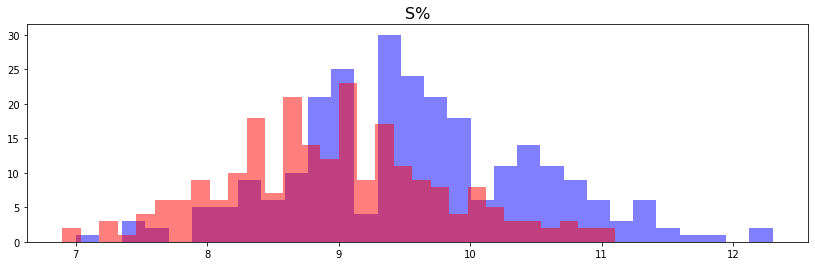

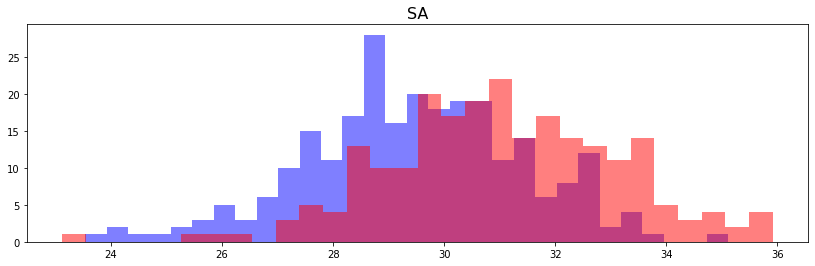

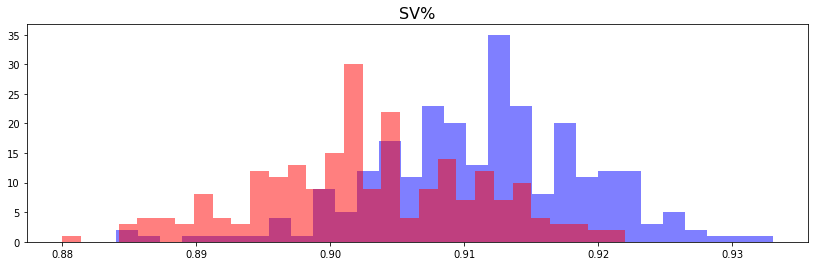

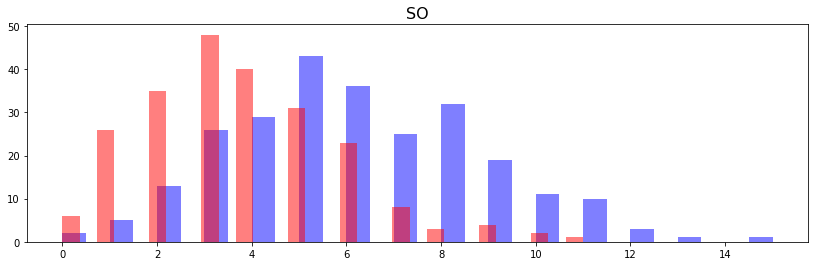

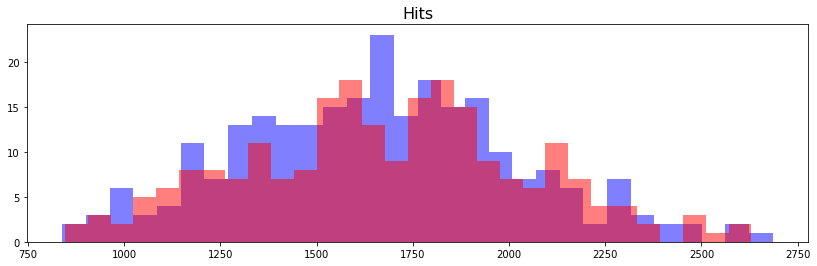

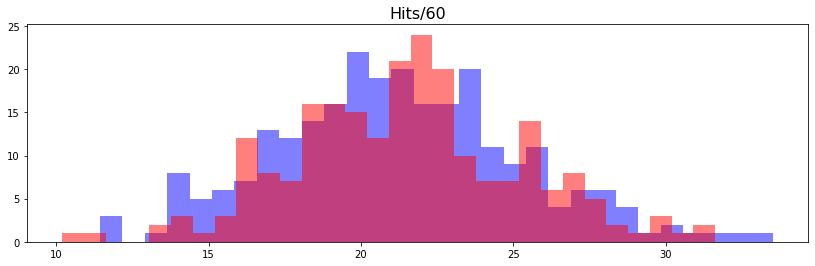

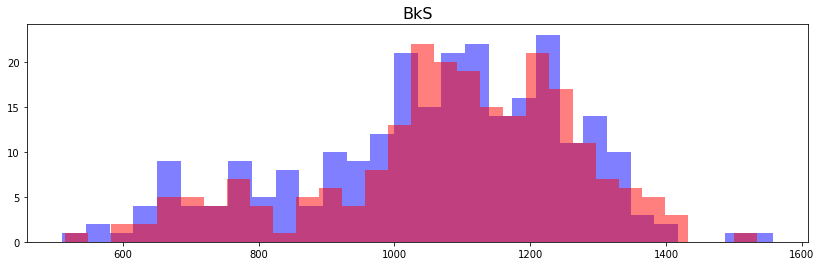

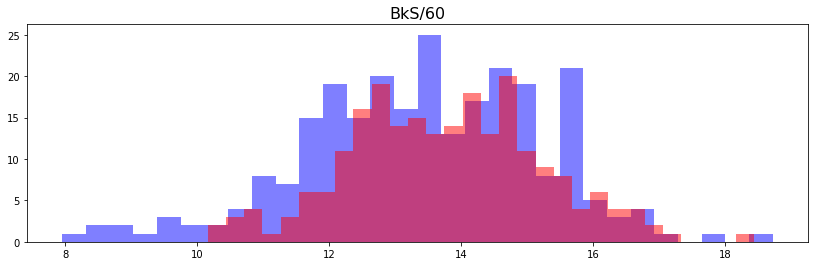

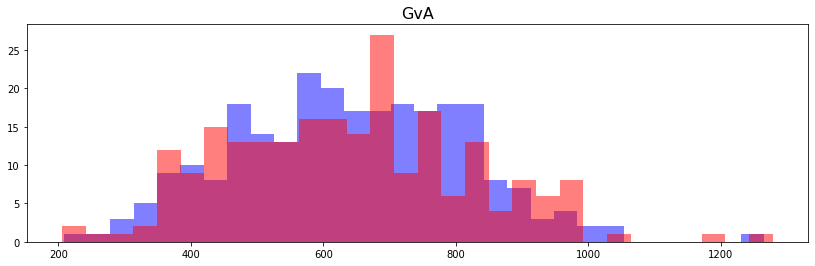

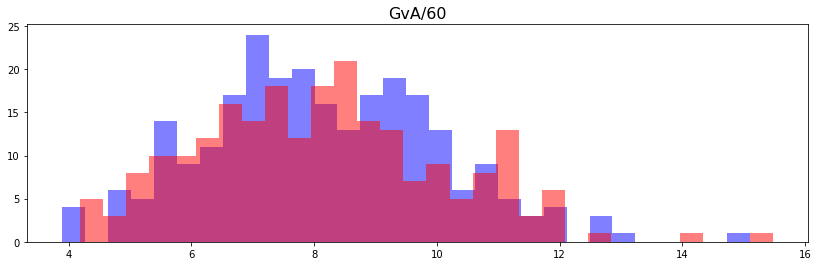

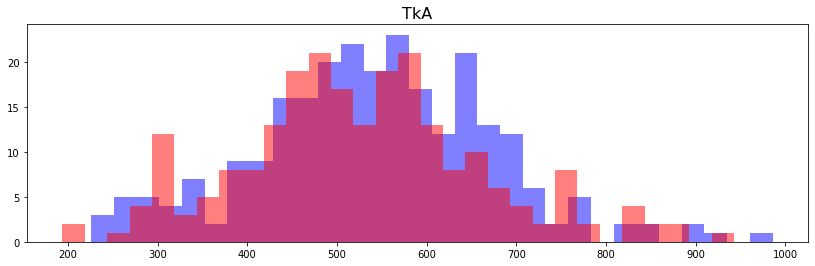

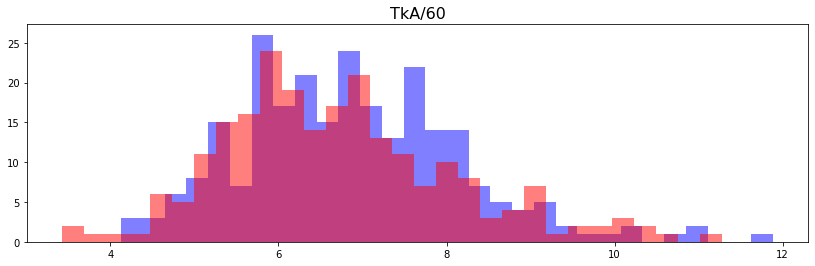

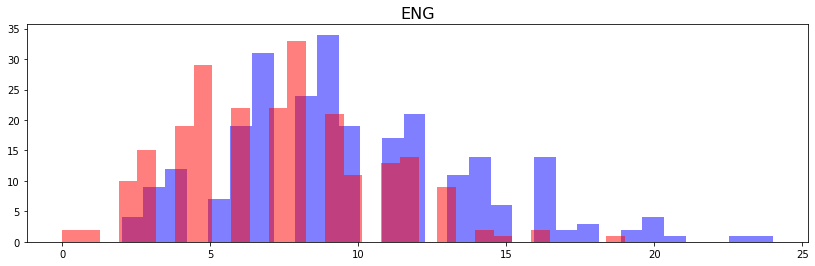

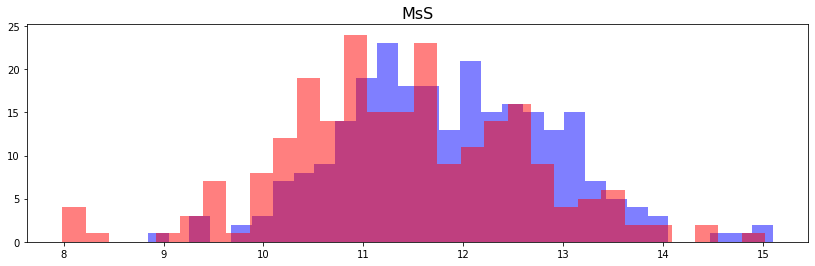

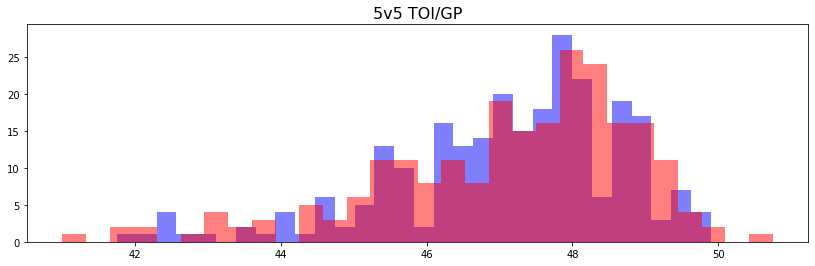

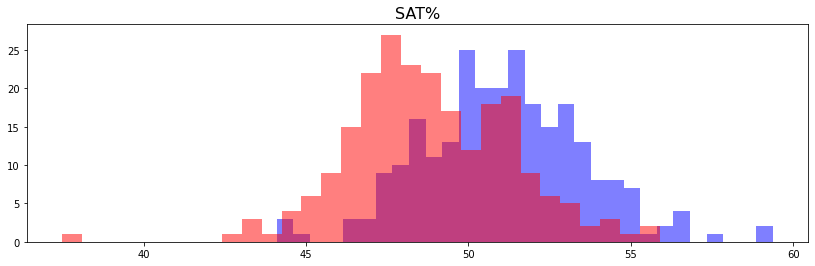

In [47]:
## histogram code
## loop through the different features
for column in range(3,46):
    plt.figure(figsize=(14,4))
    
    ## Get all observations for each column. Is this THE worst code I've ever written? Nope. Does it work? Yep.
    plt.hist(data.loc[data['Playoffs%']>=0, data.columns[column]], color='b', alpha=.5, bins=30) #qualified for playoffs
    plt.hist(data.loc[data['Playoffs%']<0, data.columns[column]], color='r', alpha=.5, bins=30) #didn't qualify for playoffs
#Any striking differences?

        
    plt.title(data.columns[column],fontsize=16)
    plt.show()

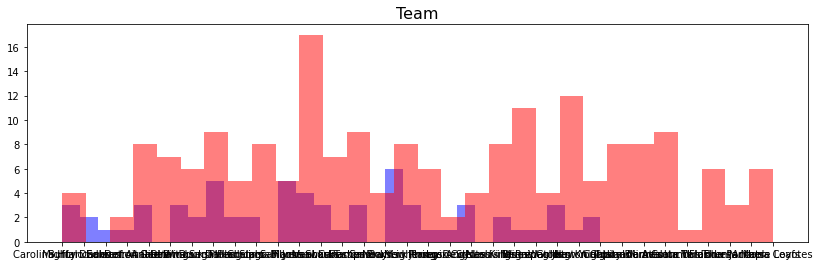

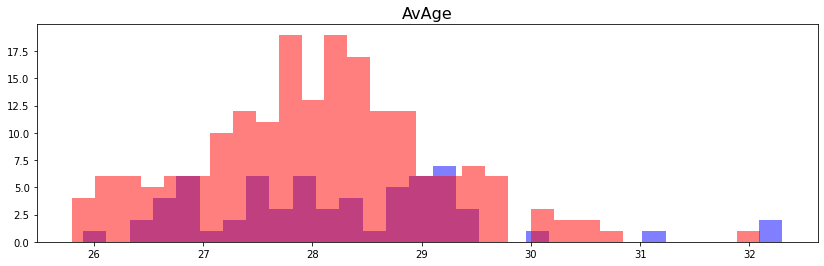

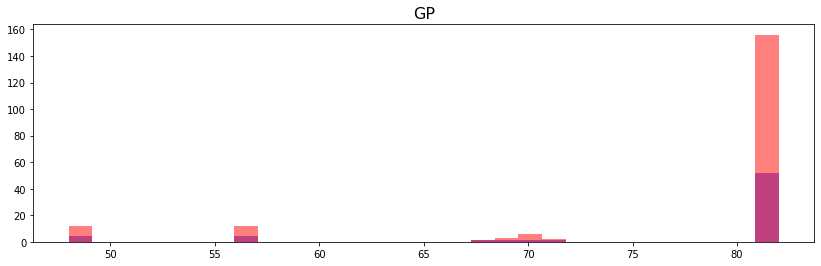

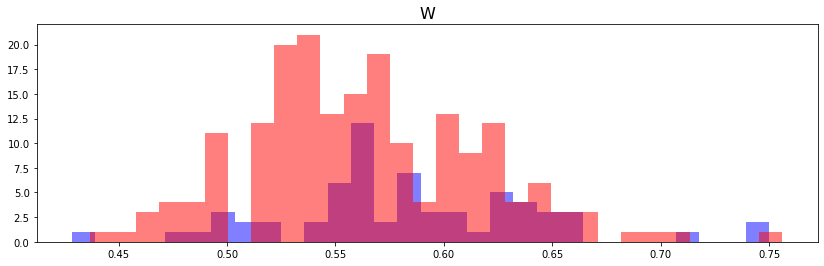

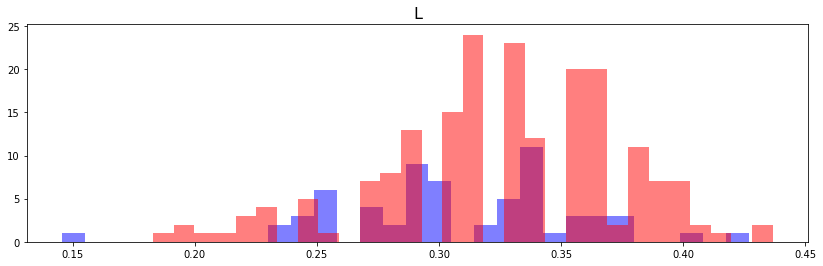

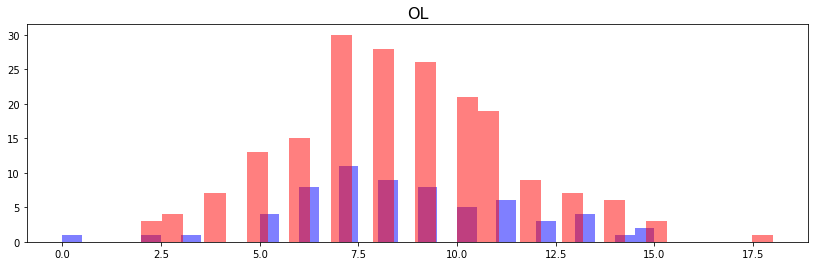

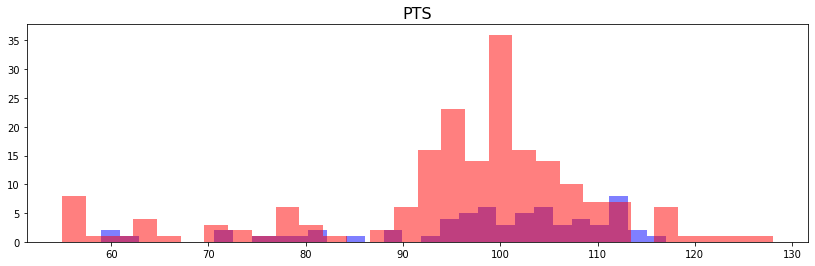

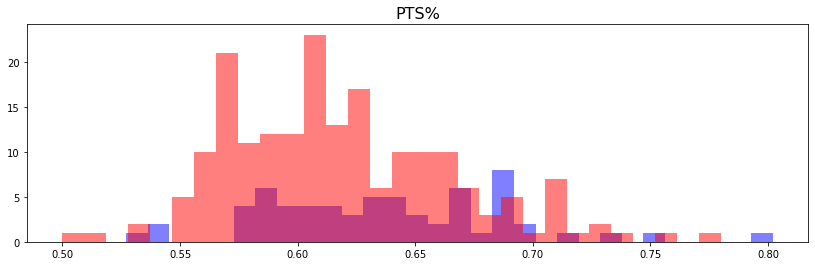

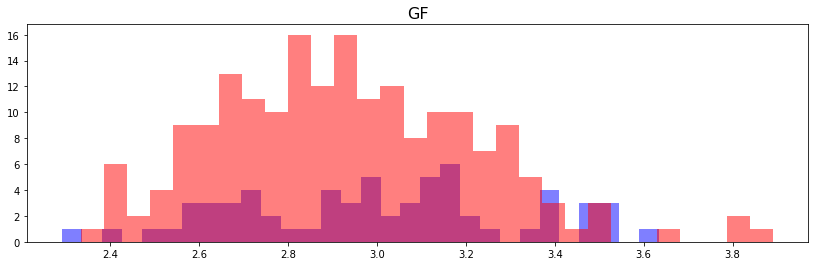

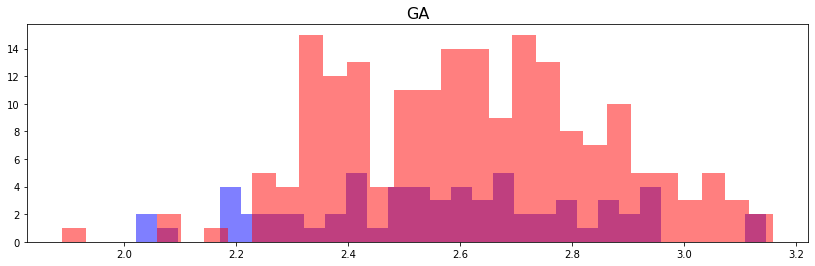

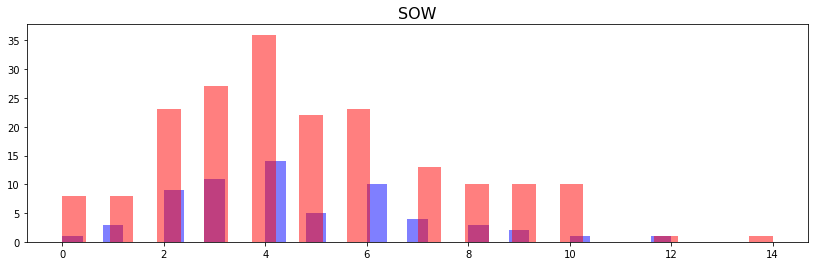

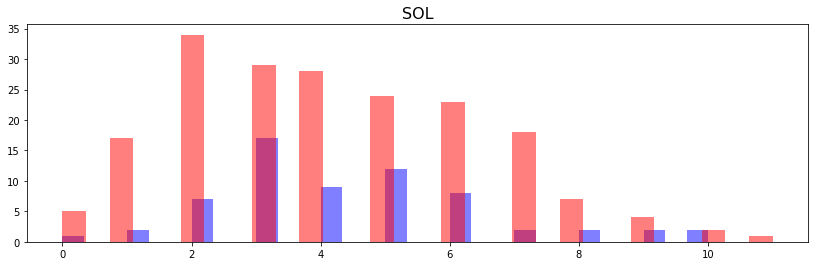

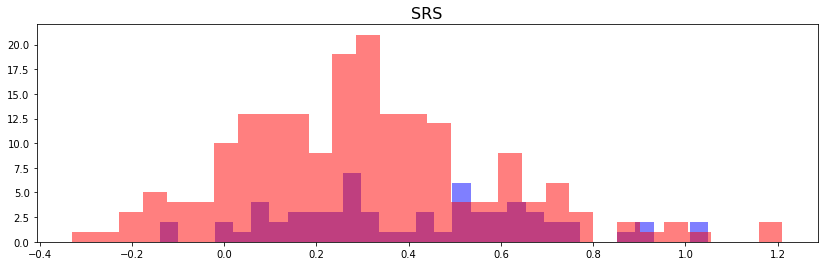

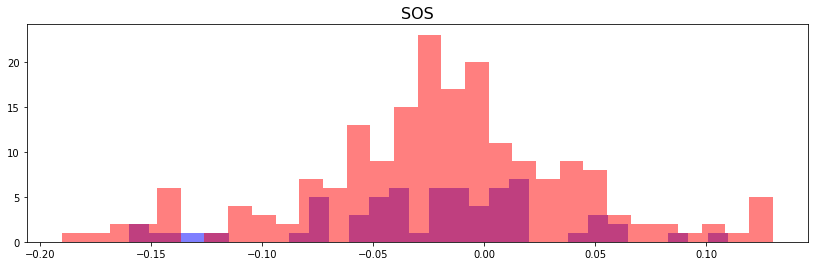

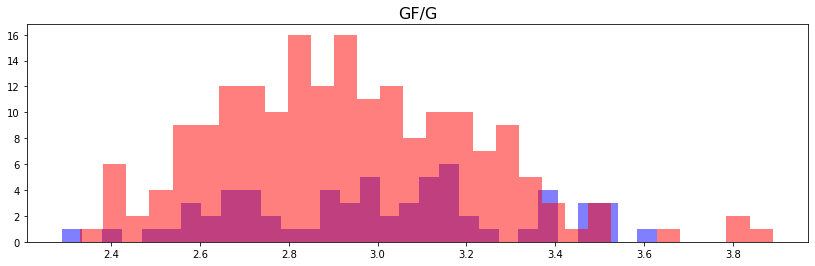

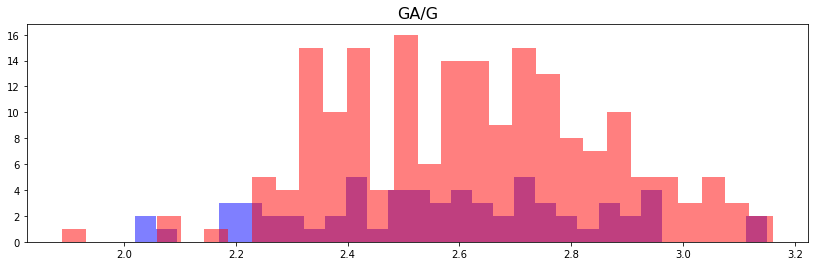

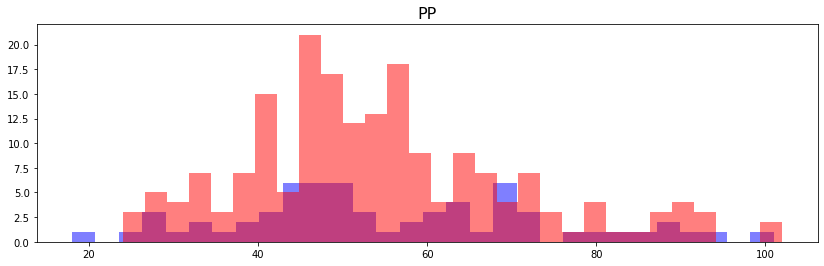

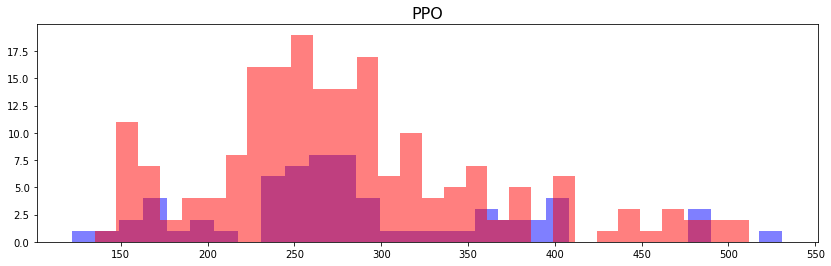

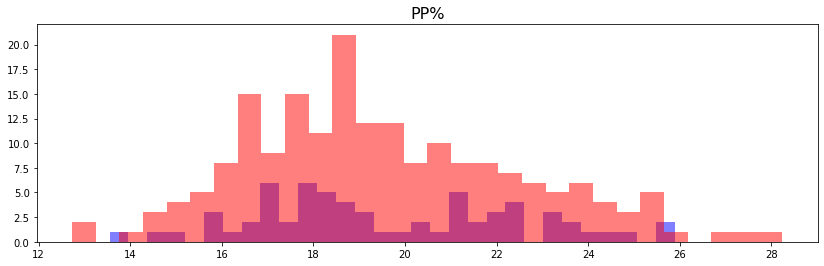

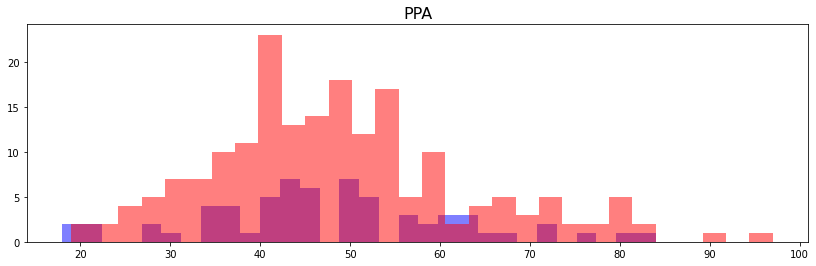

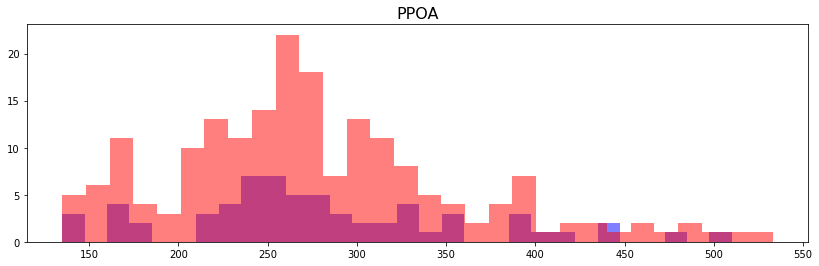

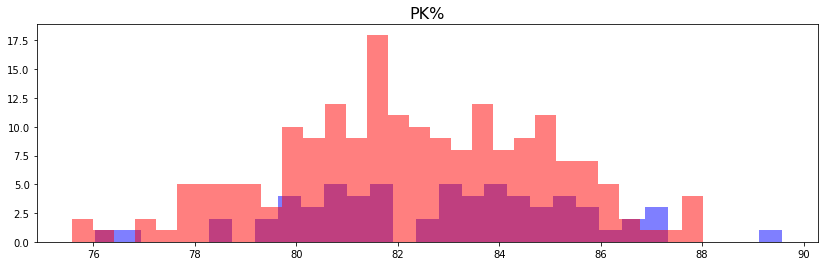

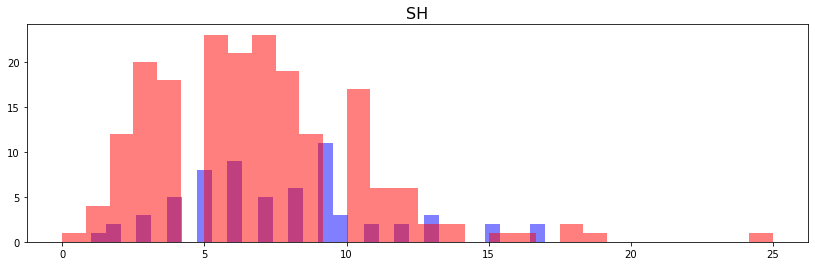

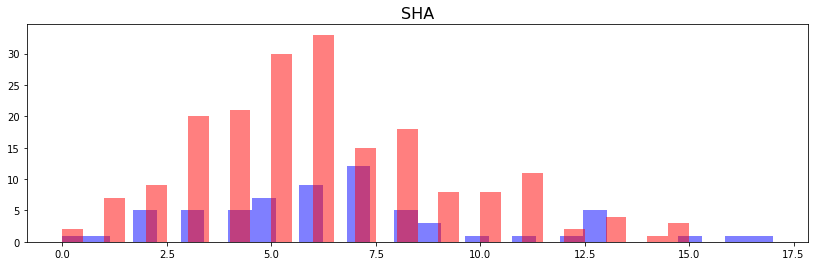

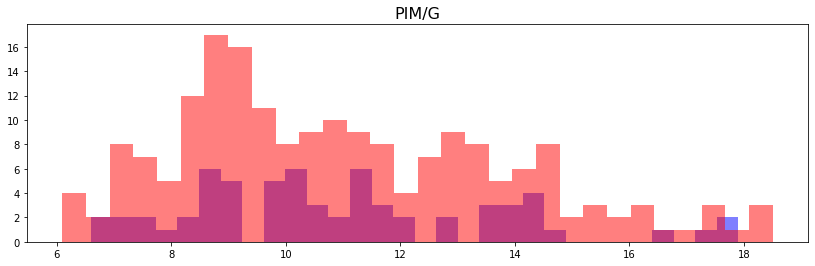

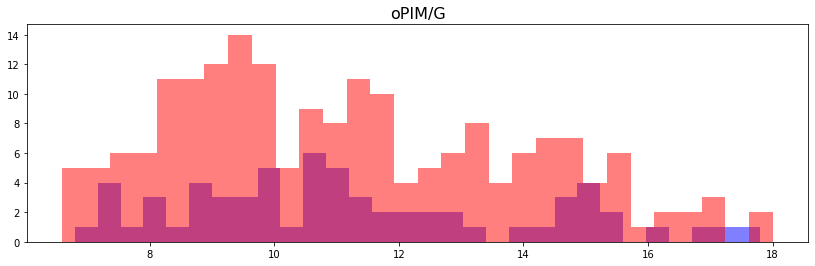

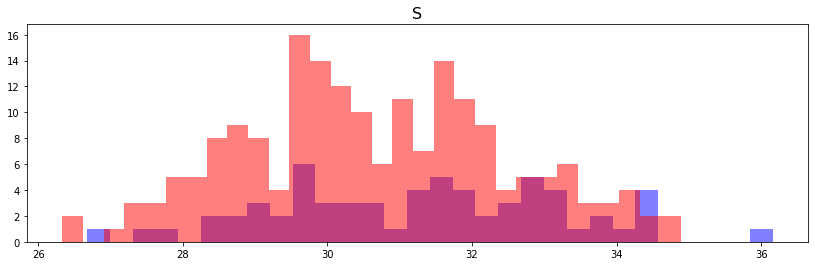

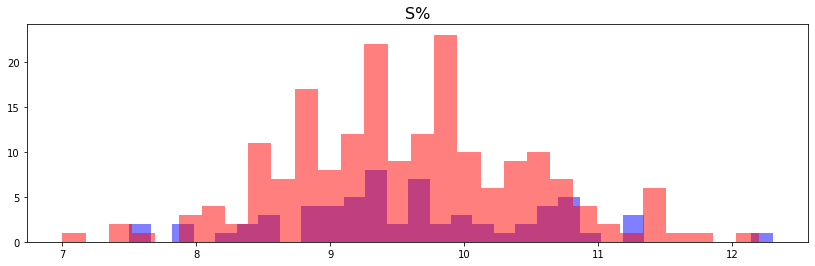

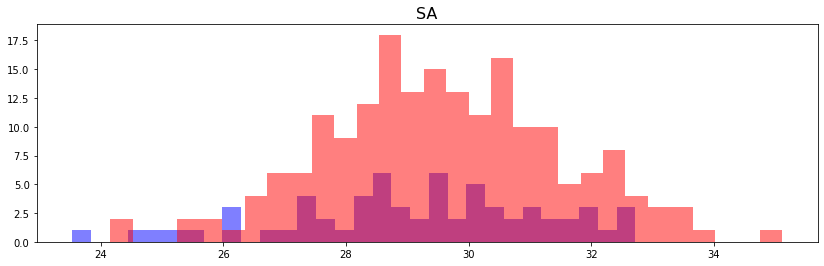

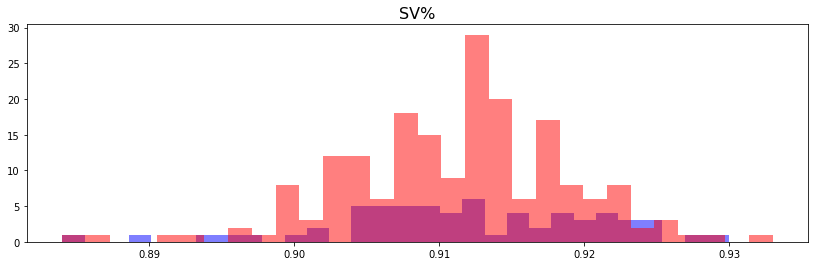

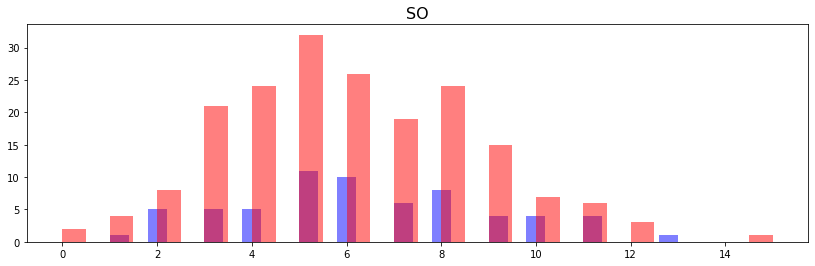

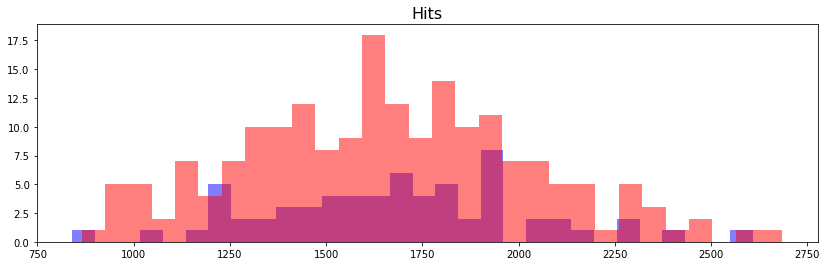

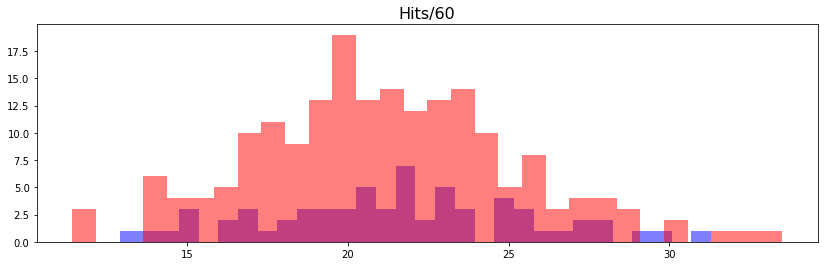

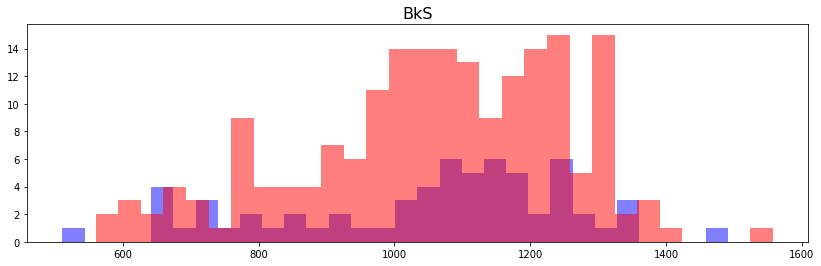

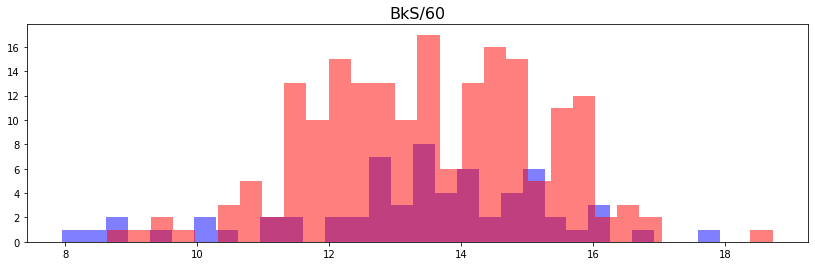

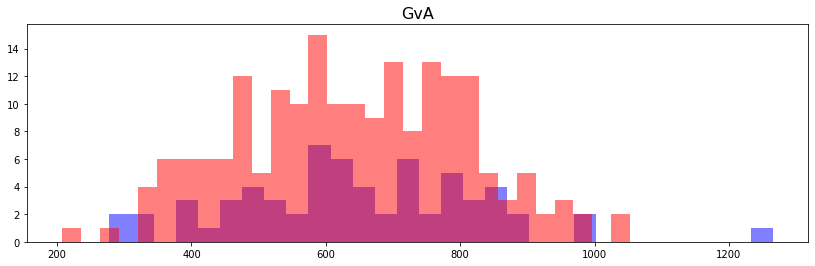

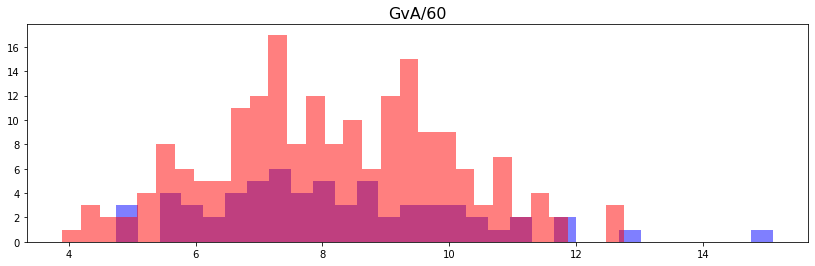

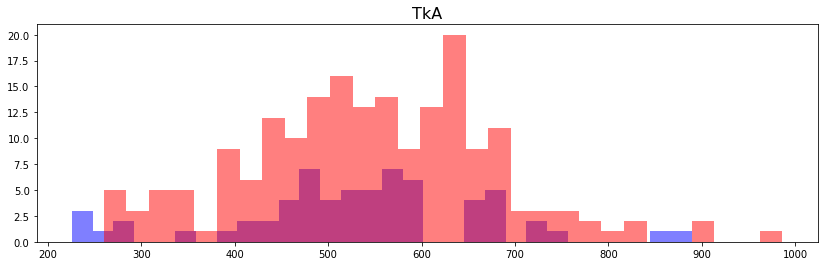

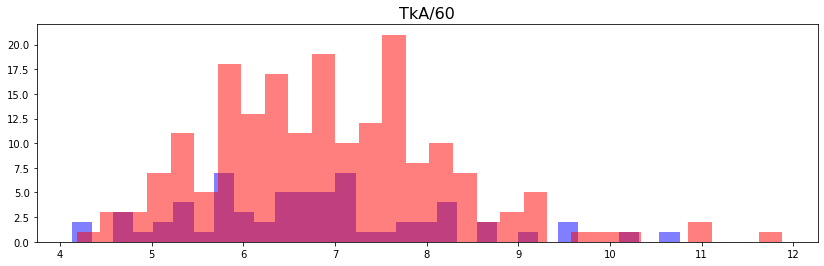

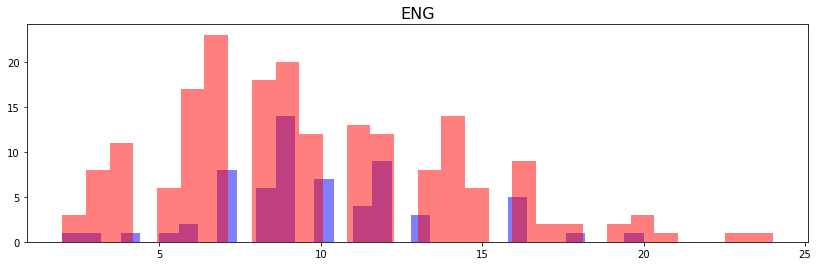

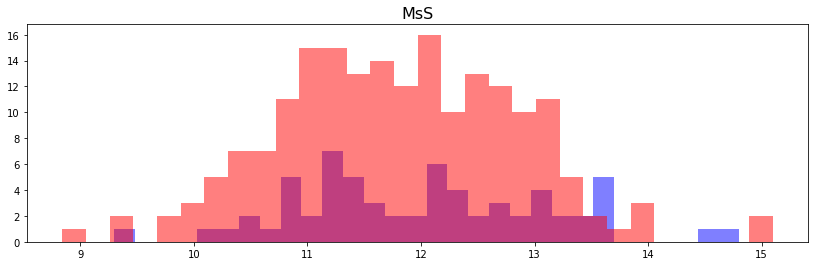

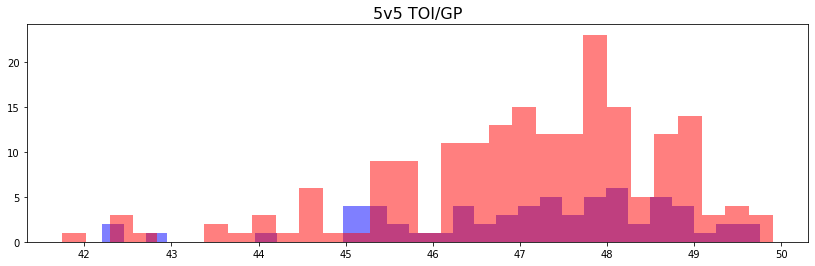

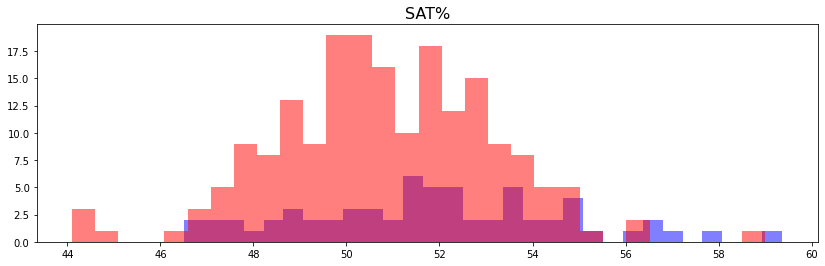

In [48]:
## histogram code

## loop through the features
for column in range(3,46):
    plt.figure(figsize=(14,4))
    
    ## Get all observations for each column. Same trash code as above, but only dealing with playoff teams, and split based on how far they went.
    plt.hist(data.loc[data['Playoffs%']>=0.5, data.columns[column]], color='b', alpha=.5, bins=30) #Made it to semis
    plt.hist(data.loc[(data['Playoffs%']>=0) & (data['Playoffs%']<0.5), data.columns[column]], color='r', alpha=.5, bins=30) #didn't

        
    plt.title(data.columns[column],fontsize=16)
    plt.show()

In [10]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
## make a train test split here
data_train, data_test = train_test_split(data.copy(),
                                          random_state = 42,
                                          shuffle = True,
                                          test_size = .2,
                                          stratify = data.Playoffs) #Yes?

In [55]:
alphas = [.00001,.0001,.001,.01,.03,.035,.04,.05,.1,.25,.4,.5]
#Only included features that had some sort of correlation to them
features = ['PTS', 'W','L', 'GF', 'GA', 'SRS', 'SOS', 'PK%', 'S%', 'SV%', 'SAT%', 'MsS', 'TA/GA']

## make coefficient holder
coefs = np.zeros((len(alphas), len(features)))

## scale quantitative variables
data_train_array = data_train[features].to_numpy()

scaler = StandardScaler()

## These are the features that need to be scaled
## 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'
scale_columns = [0,1,2,3,4,5,6, 7, 8, 9, 10, 11, 12]
data_train_array_scaled = data_train_array.copy()
data_train_array_scaled[:,scale_columns] = scaler.fit_transform(data_train_array_scaled[:,scale_columns])


## Loop through alphas
for i in range(len(alphas)):
    ## make lasso model
    lasso = Lasso(alpha=alphas[i], max_iter=10000000)
    
    
    ## fit model
    lasso.fit(data_train_array_scaled, data_train['Playoffs%'].values)
    
    ## record coefs
    coefs[i,:] = lasso.coef_
    

In [56]:
## use dataframe to look at coefs

pd.DataFrame(coefs, index=alphas, columns=features)

,PTS,W,L,GF,GA,SRS,SOS,PK%,S%,SV%,SAT%,MsS,TA/GA
0.00001,0.002767,0.258915,-0.134318,-0.134419,0.085412,0.247171,-0.055170,0.030809,-0.008762,0.024774,0.085053,-0.028827,-0.046260
0.00010,0.003177,0.265565,-0.129057,-0.100541,0.049248,0.199845,-0.048778,0.030496,-0.011102,0.022854,0.082652,-0.028451,-0.046108
0.00100,0.003448,0.285678,-0.114228,-0.000000,-0.055271,0.055177,-0.028329,0.029875,-0.014613,0.020927,0.077566,-0.025856,-0.044403
0.01000,0.000000,0.281051,-0.118388,0.000000,-0.085266,0.039388,-0.019227,0.021684,-0.000000,0.004139,0.055130,-0.000000,-0.029685
0.03000,0.000000,0.273597,-0.128687,0.000000,-0.082941,0.038328,-0.003155,0.007003,0.000000,0.000000,0.040555,0.000000,-0.006257
0.03500,0.000000,0.271225,-0.130678,0.000000,-0.081444,0.038717,-0.000000,0.003375,0.000000,0.000000,0.037304,0.000000,-0.000409
0.04000,0.000000,0.268198,-0.130090,0.000000,-0.081001,0.040646,-0.000000,0.000003,0.000000,0.000000,0.034054,0.000000,-0.000000
0.05000,0.000000,0.262025,-0.130033,0.000000,-0.076188,0.043299,-0.000000,0.000000,0.000000,0.000000,0.027894,0.000000,-0.000000
0.10000,0.000000,0.231855,-0.128742,0.000000,-0.051711,0.055644,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
0.25000,0.000000,0.169693,-0.085034,0.000000,-0.000000,0.043073,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000


Early conclusions:
The variables that seem most important are:


*   Wins
*   Losses
*   We should definitely include a W-L variable or something
*   Simple Rating System
*   Goals Against (but not goals for - interesting - might be worth doing a differential again)
*   SAT% (Corsi) (I knew this was worth adding!)
*   Penalty Kill %
*   Takeaways/Giveaways (thanks Dad!)

All of this makes perfect sense.



#Make a shitty linear model

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
## Make all potential feature combos
# This function was modified from stackexchange user hughdbrown 
# at this link, 
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset

# This returns the power set of a set minus the empty set
def powerset(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
        
    return power_set[1:]

In [59]:
## Make kfold object
kfold = StratifiedKFold(n_splits=4, #We only have 17 seasons worth of data or whatever
              shuffle=True, 
              random_state = 69)

In [69]:
models = powerset(["W", "L", "SRS", "GA", "SAT%", "PK%", "TA/GA"])
models

[['W'],
 ['L'],
 ['W', 'L'],
 ['SRS'],
 ['W', 'SRS'],
 ['L', 'SRS'],
 ['W', 'L', 'SRS'],
 ['GA'],
 ['W', 'GA'],
 ['L', 'GA'],
 ['W', 'L', 'GA'],
 ['SRS', 'GA'],
 ['W', 'SRS', 'GA'],
 ['L', 'SRS', 'GA'],
 ['W', 'L', 'SRS', 'GA'],
 ['SAT%'],
 ['W', 'SAT%'],
 ['L', 'SAT%'],
 ['W', 'L', 'SAT%'],
 ['SRS', 'SAT%'],
 ['W', 'SRS', 'SAT%'],
 ['L', 'SRS', 'SAT%'],
 ['W', 'L', 'SRS', 'SAT%'],
 ['GA', 'SAT%'],
 ['W', 'GA', 'SAT%'],
 ['L', 'GA', 'SAT%'],
 ['W', 'L', 'GA', 'SAT%'],
 ['SRS', 'GA', 'SAT%'],
 ['W', 'SRS', 'GA', 'SAT%'],
 ['L', 'SRS', 'GA', 'SAT%'],
 ['W', 'L', 'SRS', 'GA', 'SAT%'],
 ['PK%'],
 ['W', 'PK%'],
 ['L', 'PK%'],
 ['W', 'L', 'PK%'],
 ['SRS', 'PK%'],
 ['W', 'SRS', 'PK%'],
 ['L', 'SRS', 'PK%'],
 ['W', 'L', 'SRS', 'PK%'],
 ['GA', 'PK%'],
 ['W', 'GA', 'PK%'],
 ['L', 'GA', 'PK%'],
 ['W', 'L', 'GA', 'PK%'],
 ['SRS', 'GA', 'PK%'],
 ['W', 'SRS', 'GA', 'PK%'],
 ['L', 'SRS', 'GA', 'PK%'],
 ['W', 'L', 'SRS', 'GA', 'PK%'],
 ['SAT%', 'PK%'],
 ['W', 'SAT%', 'PK%'],
 ['L', 'SAT%', 'PK%'],
 ['

In [65]:
## get all models we're interested in
models = powerset(["W", "L", "SRS", "GA", "SAT%", "PK%", "TA/GA"])

## This is the baseline model
models.append("baseline")


## make empty mse holder
cv_mses = np.zeros((4, len(models)))



## loop through all splits
i = 0
for train_index, test_index in kfold.split(data_train, data_train.Playoffs):
    ## get train and holdout sets
    data_train_train = data_train.iloc[train_index]
    data_holdout = data_train.iloc[test_index]


    ## loop through all models
    j = 0
    for model in models:
        if model == "baseline":
            data_train_train_mean = data_train_train['Playoffs%'].mean()
            predict = data_train_train_mean * np.ones(len(data_holdout))
            cv_mses[i,j] = mean_squared_error(data_holdout['Playoffs%'], predict)
        else:
            ## make clone
            reg = LinearRegression(copy_X = True)
        
        
            ## fit clone
            reg.fit(data_train_train[model], data_train_train['Playoffs%'])
            predict = reg.predict(data_holdout[model])

            ## record mse
            cv_mses[i,j] = mean_squared_error(data_holdout['Playoffs%'], predict)
        j=j+1
    i=i+1  

In [66]:
## Which one had the smallest avg cv mse?
np.argmin(np.mean(cv_mses, axis=0))

90

In [67]:
## which model had lowest mean mse?
print("The model with lowest mean cv mse included the features", 
      models[np.argmin(np.mean(cv_mses, axis=0))],
      "and had an avg cv mse of",
      np.mean(cv_mses, axis=0)[np.argmin(np.mean(cv_mses, axis=0))])

The model with lowest mean cv mse included the features ['W', 'L', 'GA', 'SAT%', 'TA/GA'] and had an avg cv mse of 0.19113085487687353


In [68]:
np.mean(cv_mses, axis=0)[-1]

0.495544436050301

#Slightly less shitty model

In [70]:
features = ['W', 'L', 'GA', 'SAT%', 'TA/GA']
reg.fit(data_train[features], data_train['Playoffs%'])
predict = reg.predict(data_test[features])

mean_squared_error(data_test['Playoffs%'], predict)

0.22247251930243542

Holy shit, is that even better? Wait, what on earth are we predicting? Who wins?

Reset data one more time

In [73]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Erdos Institute Boot Camp/Erdos Institute Final Project - SKYLAB/TeamCleaned.csv") #TeamData.csv
data['W'] = data['W']/data['GP']
data['L'] = data['L']/data['GP']
data['GF'] = data['GF']/data['GP']
data['GA'] = data['GA']/data['GP']
data['S'] = data['S']/data['GP']
data['SA'] = data['SA']/data['GP']
data['MsS'] = data['MsS']/data['GP']
data['TA/GA'] = data['TkA/60']/data['GvA/60']

prediction_data = data[-32:]

In [75]:
predict = reg.predict(prediction_data[features])
predict

array([ 0.73664345,  0.55013113,  0.70674828,  0.4263991 ,  0.30414387,
        0.5086396 ,  0.23079348,  0.32314583,  0.0815623 ,  0.36754577,
        0.09984525,  0.07675054, -0.12163671,  0.00319539, -0.09252022,
       -0.16953274, -0.24385906, -0.34331595, -0.46868012, -0.57093711,
       -0.9337825 , -1.02722674, -0.96651046, -1.06398034, -1.21102372,
       -0.96844718, -1.34893229, -1.39940904, -1.52341214, -1.40710041,
       -1.71552479, -1.74955359])

In [88]:
print("We predict the ",prediction_data.loc[484+np.argmax(predict)].Team, " are going to win the Stanley Cup")

We predict the  Florida Panthers  are going to win the Stanley Cup


In [ ]:
#We did it, reddit